In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../data/train_part2_cleaned.csv')

In [3]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2015-05-05,268643,4,2.25,1810,9240,2.0,0,0,3,...,0,1961,0,98055,47.4362,-122.187,1660,9240,2015,5
1,2014-07-08,245000,3,2.50,1600,2788,2.0,0,0,4,...,0,1992,0,98031,47.4034,-122.187,1720,3605,2014,7
2,2015-01-15,200000,4,2.50,1720,8638,2.0,0,0,3,...,0,1994,0,98003,47.2704,-122.313,1870,7455,2015,1
3,2015-04-27,352499,2,2.25,1240,705,2.0,0,0,3,...,90,2009,0,98027,47.5321,-122.073,1240,750,2015,4
4,2014-12-05,232000,3,2.00,1280,13356,1.0,0,0,3,...,0,1994,0,98042,47.3715,-122.074,1590,8071,2014,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,2014-11-13,378000,3,1.50,1000,6914,1.0,0,0,3,...,0,1947,0,98125,47.7144,-122.319,1000,6947,2014,11
16205,2014-11-11,399950,3,2.50,3087,5002,2.0,0,0,3,...,0,2014,0,98023,47.2974,-122.349,2927,5183,2014,11
16206,2014-09-30,575000,3,2.50,2120,4780,2.0,0,0,3,...,0,2004,0,98053,47.6810,-122.032,1690,2650,2014,9
16207,2014-06-20,245000,1,0.75,380,15000,1.0,0,0,3,...,0,1963,0,98168,47.4810,-122.323,1170,15000,2014,6


# Exploring Latitude Longitude

In [6]:
import folium
from folium.plugins import HeatMap

In [7]:
data = df[['lat', 'long', 'price']].copy()
data

,lat,long,price
0,47.4362,-122.187,268643
1,47.4034,-122.187,245000
2,47.2704,-122.313,200000
3,47.5321,-122.073,352499
4,47.3715,-122.074,232000
...,...,...,...
16204,47.7144,-122.319,378000
16205,47.2974,-122.349,399950
16206,47.6810,-122.032,575000
16207,47.4810,-122.323,245000


In [8]:
# 2. Initialize the map at the mean location of your dataset
map_center = [data['lat'].mean(), data['long'].mean()]
m = folium.Map(location=map_center, zoom_start=10, tiles='CartoDB positron')

In [9]:
heat_data = [[row['lat'], row['long'], row['price']] for index, row in data.iterrows()]

In [10]:
# 4. Add the HeatMap layer
HeatMap(heat_data, 
        radius=15, 
        blur=20, 
        min_opacity=0.5,
        max_val=data['price'].max()).add_to(m)

/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_18434/3318057126.py:2: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,


In [12]:

# 5. Save and View
m.save('wealth_heatmap.html')
# If in a notebook, simply call 'm' to display it


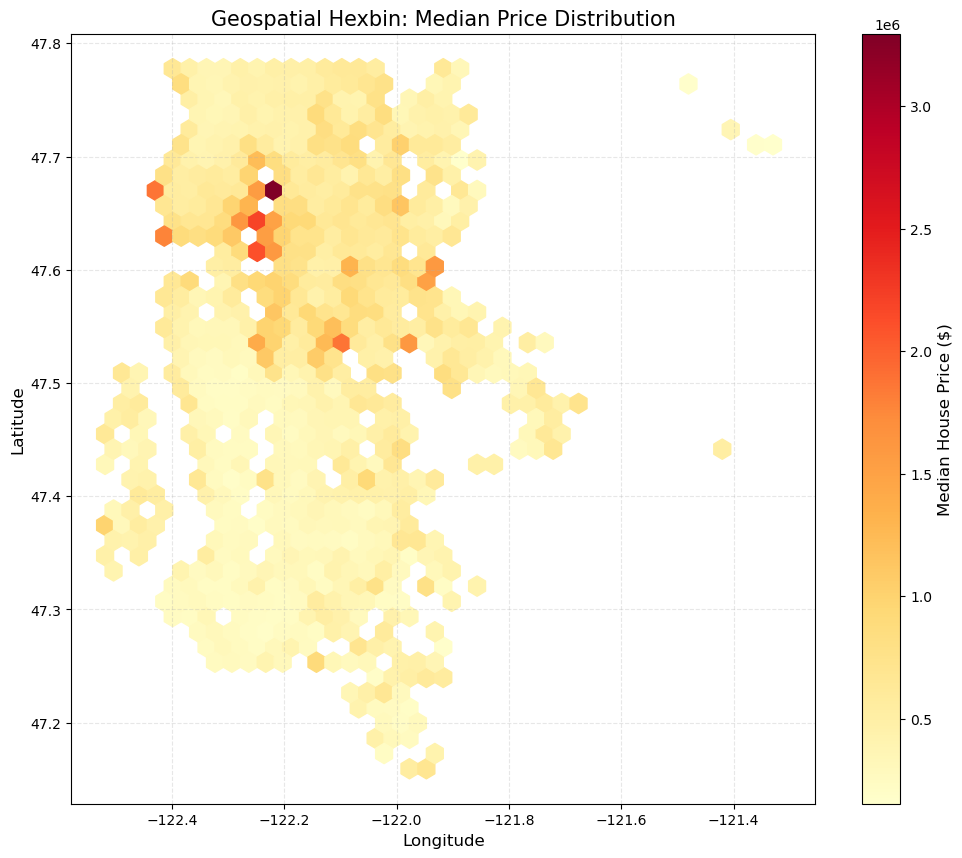

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Setup the figure
plt.figure(figsize=(12, 10))

# 2. Create the Hexbin
# C=price means the color is determined by the price
# reduce_C_function=np.median means each hex shows the MEDIAN price of homes in that area
hb = plt.hexbin(df['long'], df['lat'], 
                C=df['price'], 
                gridsize=40, 
                cmap='YlOrRd', 
                reduce_C_function=np.median,
                mincnt=1) # only show hexes with at least 1 house

# 3. Add a Colorbar
cb = plt.colorbar(hb)
cb.set_label('Median House Price ($)', fontsize=12)

# 4. Labels and Title
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Geospatial Hexbin: Median Price Distribution', fontsize=15)

# 5. Clean up
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


In [15]:
pip install geopandas libpysal esda splot shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 473.2 kB/s eta 0:00:00 kB/s eta 0:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 341.1 kB/s eta 0:00:00 kB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [16]:
import libpysal
from esda.moran import Moran
import geopandas as gpd
from shapely.geometry import Point

# 1. Convert your DataFrame to a GeoDataFrame
# We use 'lat' and 'long' to create geometry points
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# 2. Create the Spatial Weights matrix
# We use K-Nearest Neighbors (KNN) because points might be spread out
# k=8 is a standard choice for local neighborhood modeling
w = libpysal.weights.KNN.from_dataframe(gdf, k=8)
w.transform = 'R'  # Row-standardize weights for unbiased average

# 3. Calculate Global Moran's I
moran = Moran(gdf['price'], w)

# 4. Print results
print(f"Moran's I Statistic: {moran.I:.4f}")
print(f"Expectation: {moran.EI:.4f}")
print(f"P-value: {moran.p_norm:.5f}")

# 5. Interpretation
if moran.p_norm < 0.05:
    print("Significant Spatial Autocorrelation: Prices are geographically clustered.")
else:
    print("No significant spatial clustering detected.")


/opt/anaconda3/lib/python3.12/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I Statistic: 0.5776
Expectation: -0.0001
P-value: 0.00000
Significant Spatial Autocorrelation: Prices are geographically clustered.


In [17]:
import folium
from folium.plugins import MarkerCluster

# 1. Initialize the map
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

# 2. Create a Marker Cluster object
marker_cluster = MarkerCluster().add_to(m)

# 3. Add each house to the map
# We use a loop to create a custom popup for every row
for idx, row in df.iterrows():
    # Define the HTML content for the popup
    popup_text = f"""
    <div style='width: 150px'>
        <b>Price:</b> ${row['price']:,.0f}<br>
        <b>Beds:</b> {row['bedrooms']}<br>
        <b>Baths:</b> {row['bathrooms']}<br>
        <b>Sqft:</b> {row['sqft_living']}<br>
        <b>Built:</b> {row['yr_built']}
    </div>
    """
    
    # Choose color based on price (Green=Low, Orange=Medium, Red=High)
    if row['price'] < 500000:
        p_color = 'green'
    elif row['price'] < 1000000:
        p_color = 'orange'
    else:
        p_color = 'red'

    # Add CircleMarker to the cluster
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=6,
        popup=folium.Popup(popup_text, max_width=300),
        color=p_color,
        fill=True,
        fill_color=p_color,
        fill_opacity=0.7
    ).add_to(marker_cluster)

# 4. Save to HTML
m.save('property_explorer.html')
